# Data Distribution Plots

I want to use pixel rnn / pixel cnn. But one problem with those models is that they output a discrete 256 value for each pixel, which is clearly too coarsely grained for this model.

In [1]:
import sys
sys.path.append('../scripts')
import data_loader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
dl = data_loader.DataLoader([100], test=True)
flat_ecals = [ecal.flatten() for ecal,_ in dl.train_batch_iter(batch_size=1, num_epochs=1)]
all_data = np.concatenate(flat_ecals).ravel()  # 1,000,000 numbers, 855,832 of them are zero!
print(len(all_data))

from sklearn.neighbors import KernelDensity

def print_ecal_dist(flat_ecals, kde_band=0.5):
    X_plot = np.linspace(min(flat_ecals), max(flat_ecals), 1000)

    kernel = 'gaussian' 
    kde = KernelDensity(kernel=kernel, bandwidth=kde_band).fit(flat_ecals[:, np.newaxis])
    log_dens = kde.score_samples(X_plot[:, np.newaxis])
    
    fig, ax = plt.subplots()    
    ax.plot(X_plot, np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))
    ax.legend(loc='upper right')
    plt.show()    

Can't even plot data with the zeros, there are just too many zeros. 85.5% of the data is exactly zero.

144168


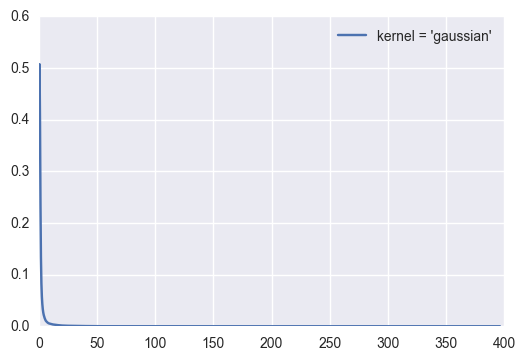

In [5]:
nozero_data = all_data[np.where(all_data > 0.0)]
print(len(nozero_data))
print_ecal_dist(nozero_data, kde_band=0.5)

Everything is really small. Graph the distribution of just the small data.

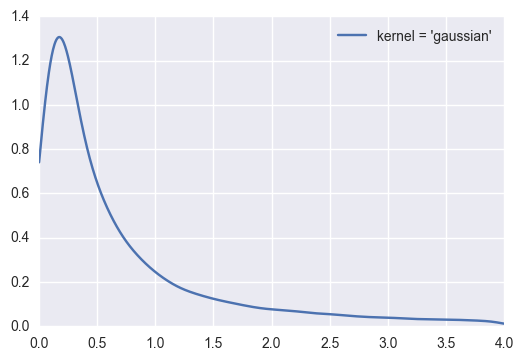

In [6]:
small_data = all_data[np.where(all_data > 0.0)]
small_data = small_data[np.where(small_data < 4)]
print_ecal_dist(small_data, kde_band=0.1)

Now graph the midsize data

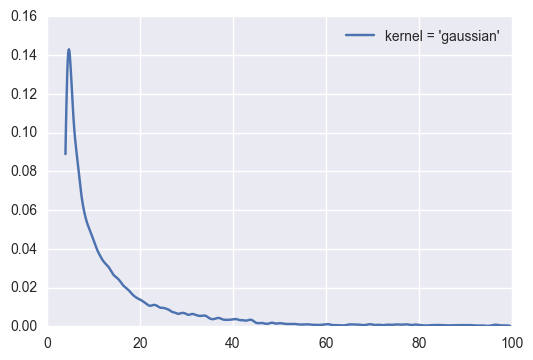

In [7]:
med_data = all_data[np.where(all_data >= 4)]
med_data = med_data[np.where(med_data < 100)]
print_ecal_dist(med_data, kde_band=0.5)

Graph the large data

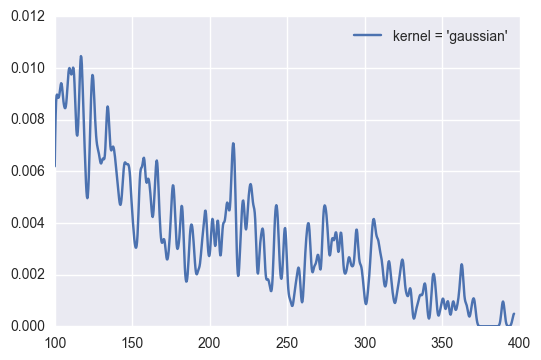

In [8]:
big_data = all_data[np.where(all_data >= 100)]
print_ecal_dist(big_data, kde_band=1)